In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
features  = pd.read_csv("C:/Users/Sahil/Documents/Columbia Documents/AML/Group Project/walmart-recruiting-store-sales-forecasting/features.csv/features.csv")
train = pd.read_csv("C:/Users/Sahil/Documents/Columbia Documents/AML/Group Project/walmart-recruiting-store-sales-forecasting/train.csv/train.csv")
stores = pd.read_csv("C:/Users/Sahil/Documents/Columbia Documents/AML/Group Project/walmart-recruiting-store-sales-forecasting/stores.csv")

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
df = pd.merge(left=features,right=train,on=["Store","Date"],how='left')

In [6]:
df.drop("IsHoliday_x",inplace=True,axis=1)
df.rename(columns={"IsHoliday_y":"IsHoliday"},inplace=True)

In [7]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1.0,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2.0,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3.0,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4.0,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5.0,32229.38,False


<Axes: >

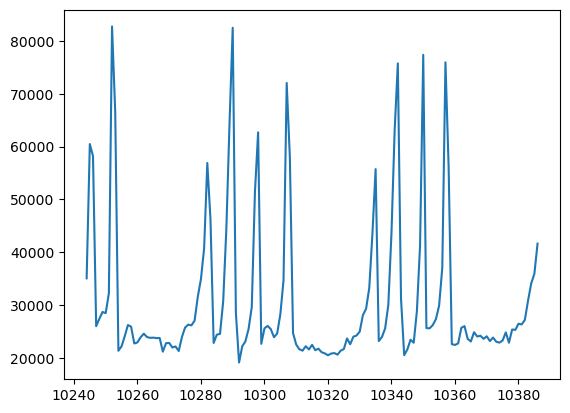

In [41]:
train[(train['Dept']==1) & (train['Store']==2)]['Weekly_Sales'].plot()

In [30]:
train[train['Store']==1].nunique()

Store               1
Dept               77
Date              143
Weekly_Sales    10042
IsHoliday           2
dtype: int64